# Analisis dan Pemodelan Machine Learning Dataset Boston Housing

Dalam notebook ini, kita akan melakukan:
1. Eksplorasi Data (EDA)
2. Preprocessing dan Handling Missing Values
3. Feature Engineering
4. Pemodelan dengan Teknik Bagging (Random Forest)
5. Pemodelan dengan Teknik Boosting (Gradient Boosting, AdaBoost, XGBoost)
6. Evaluasi Model dengan RMSE, MSE, dan R-Squared

In [19]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from math import sqrt
from sklearn.datasets import fetch_openml

# Set style untuk visualisasi
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Supaya output tidak terpotong
pd.set_option('display.max_columns', None)

## 1. Membaca dan Mengeksplorasi Data

In [20]:
# Membaca data Boston Housing dari sklearn
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.data
boston_df['MEDV'] = boston.target  # Menambahkan target (median value)

# Melihat 5 data pertama
print("Dimensi dataset:", boston_df.shape)
boston_df.head()

Dimensi dataset: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [21]:
# Informasi data
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [22]:
# Statistik deskriptif
boston_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
# Memeriksa missing values
missing_values = boston_df.isnull().sum()
missing_percentage = (missing_values / len(boston_df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values:")
missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
# Memeriksa missing values pada target (MEDV)
print(f"Jumlah nilai NaN dalam kolom target (MEDV): {boston_df['MEDV'].isnull().sum()}")
print(f"Persentase nilai NaN dalam kolom target: {boston_df['MEDV'].isnull().sum() / len(boston_df) * 100:.2f}%")

# Menghapus baris dengan nilai NaN pada target (jika ada)
boston_df_clean = boston_df.dropna(subset=['MEDV'])
print(f"Jumlah baris sebelum menghapus NaN: {len(boston_df)}")
print(f"Jumlah baris setelah menghapus NaN: {len(boston_df_clean)}")

# Gunakan boston_df_clean untuk analisis selanjutnya
boston_df = boston_df_clean.copy()

# Penanganan missing values pada fitur
# Tampilkan missing values pada fitur
missing_values = boston_df.isnull().sum()
print("Missing values pada fitur:")
print(missing_values[missing_values > 0])

# Imputasi untuk fitur numerik
numeric_features = boston_df.select_dtypes(include=['float64', 'int64']).columns.drop(['MEDV'])
for col in numeric_features:
    if boston_df[col].isnull().sum() > 0:
        boston_df[col].fillna(boston_df[col].median(), inplace=True)

# Imputasi untuk fitur kategorikal
categorical_features = ['CHAS']  # CHAS adalah fitur dummy/kategorikal (0 atau 1)
for col in categorical_features:
    if boston_df[col].isnull().sum() > 0:
        boston_df[col].fillna(boston_df[col].mode()[0], inplace=True)

# Verifikasi tidak ada lagi missing values
print("Missing values setelah imputasi:", boston_df.isnull().sum().sum())

Missing Values:
Jumlah nilai NaN dalam kolom target (MEDV): 0
Persentase nilai NaN dalam kolom target: 0.00%
Jumlah baris sebelum menghapus NaN: 506
Jumlah baris setelah menghapus NaN: 506
Missing values pada fitur:
Series([], dtype: int64)
Missing values setelah imputasi: 0


## 2. Exploratory Data Analysis (EDA)

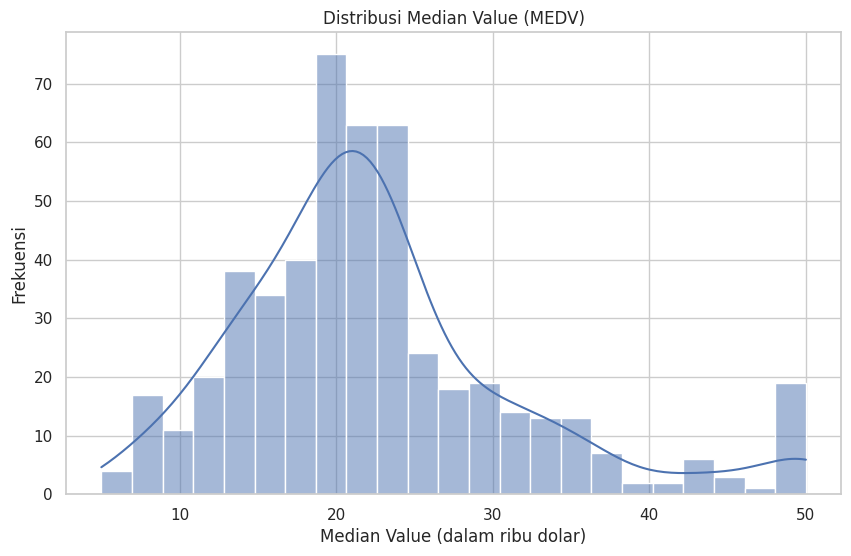

Skewness MEDV: 1.1080984082549072


In [24]:
# Memeriksa distribusi target (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['MEDV'], kde=True)
plt.title('Distribusi Median Value (MEDV)')
plt.xlabel('Median Value (dalam ribu dolar)')
plt.ylabel('Frekuensi')
plt.show()

# Memeriksa skewness
print(f"Skewness MEDV: {boston_df['MEDV'].skew()}")

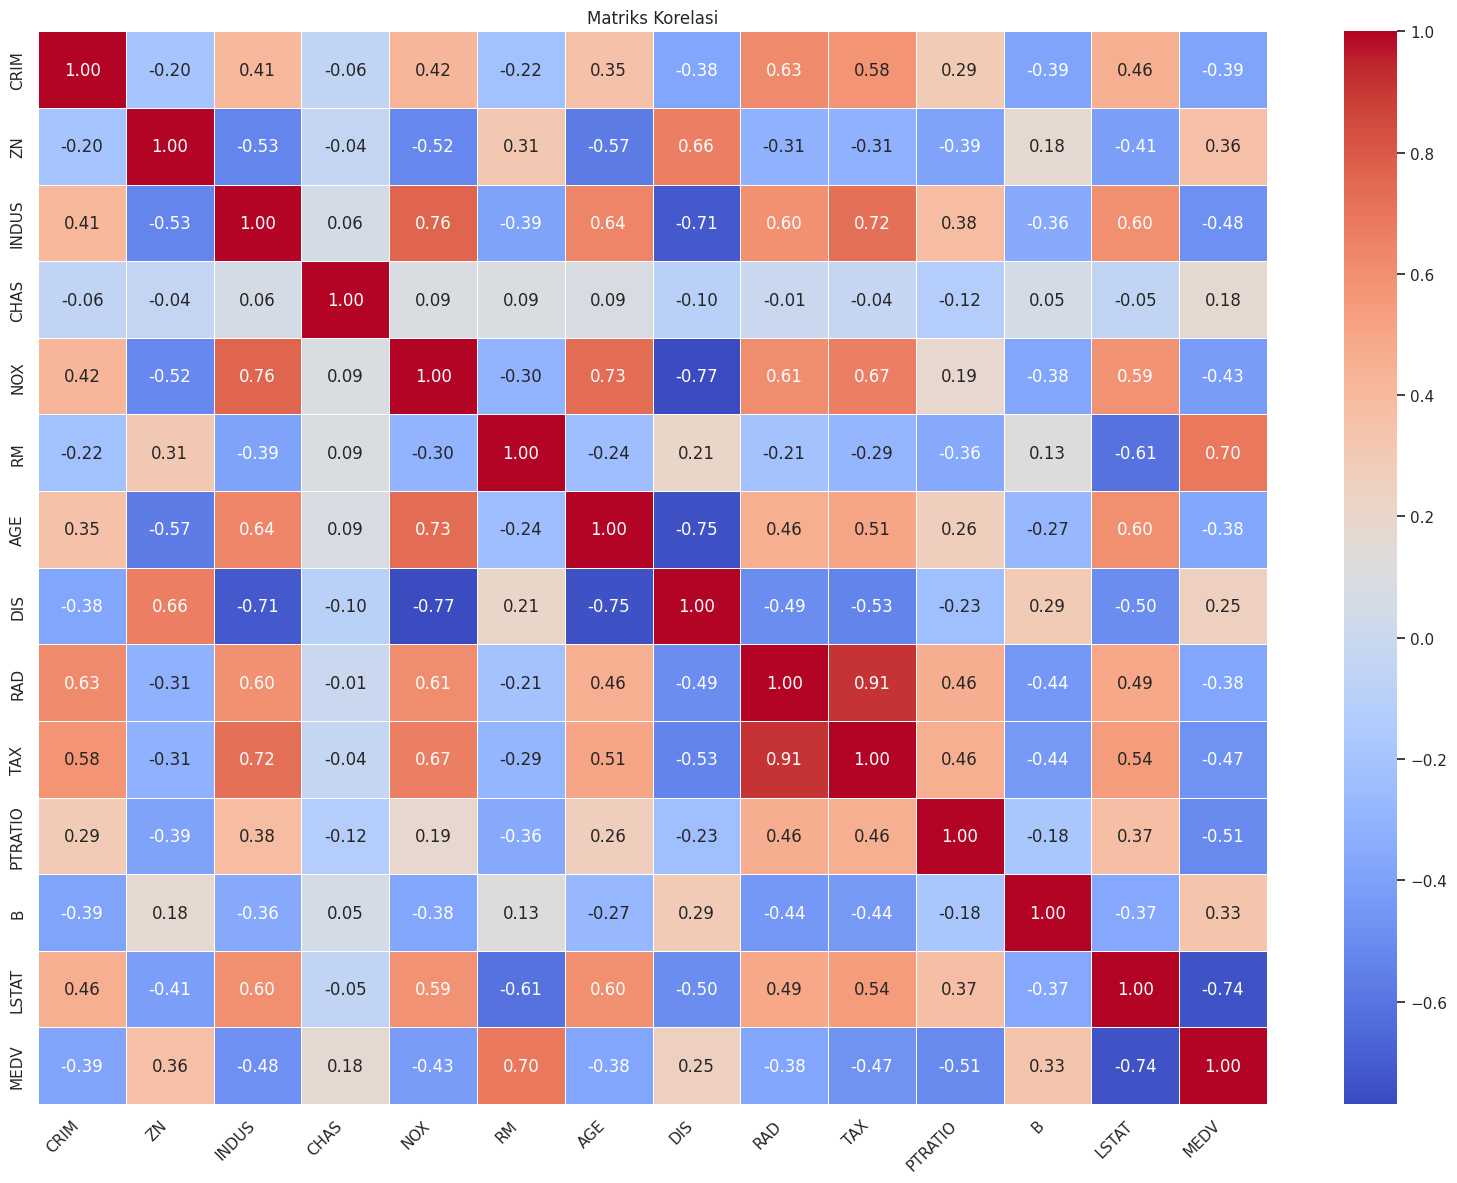

In [25]:
# Melihat korelasi antara fitur numerik
correlation_matrix = boston_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

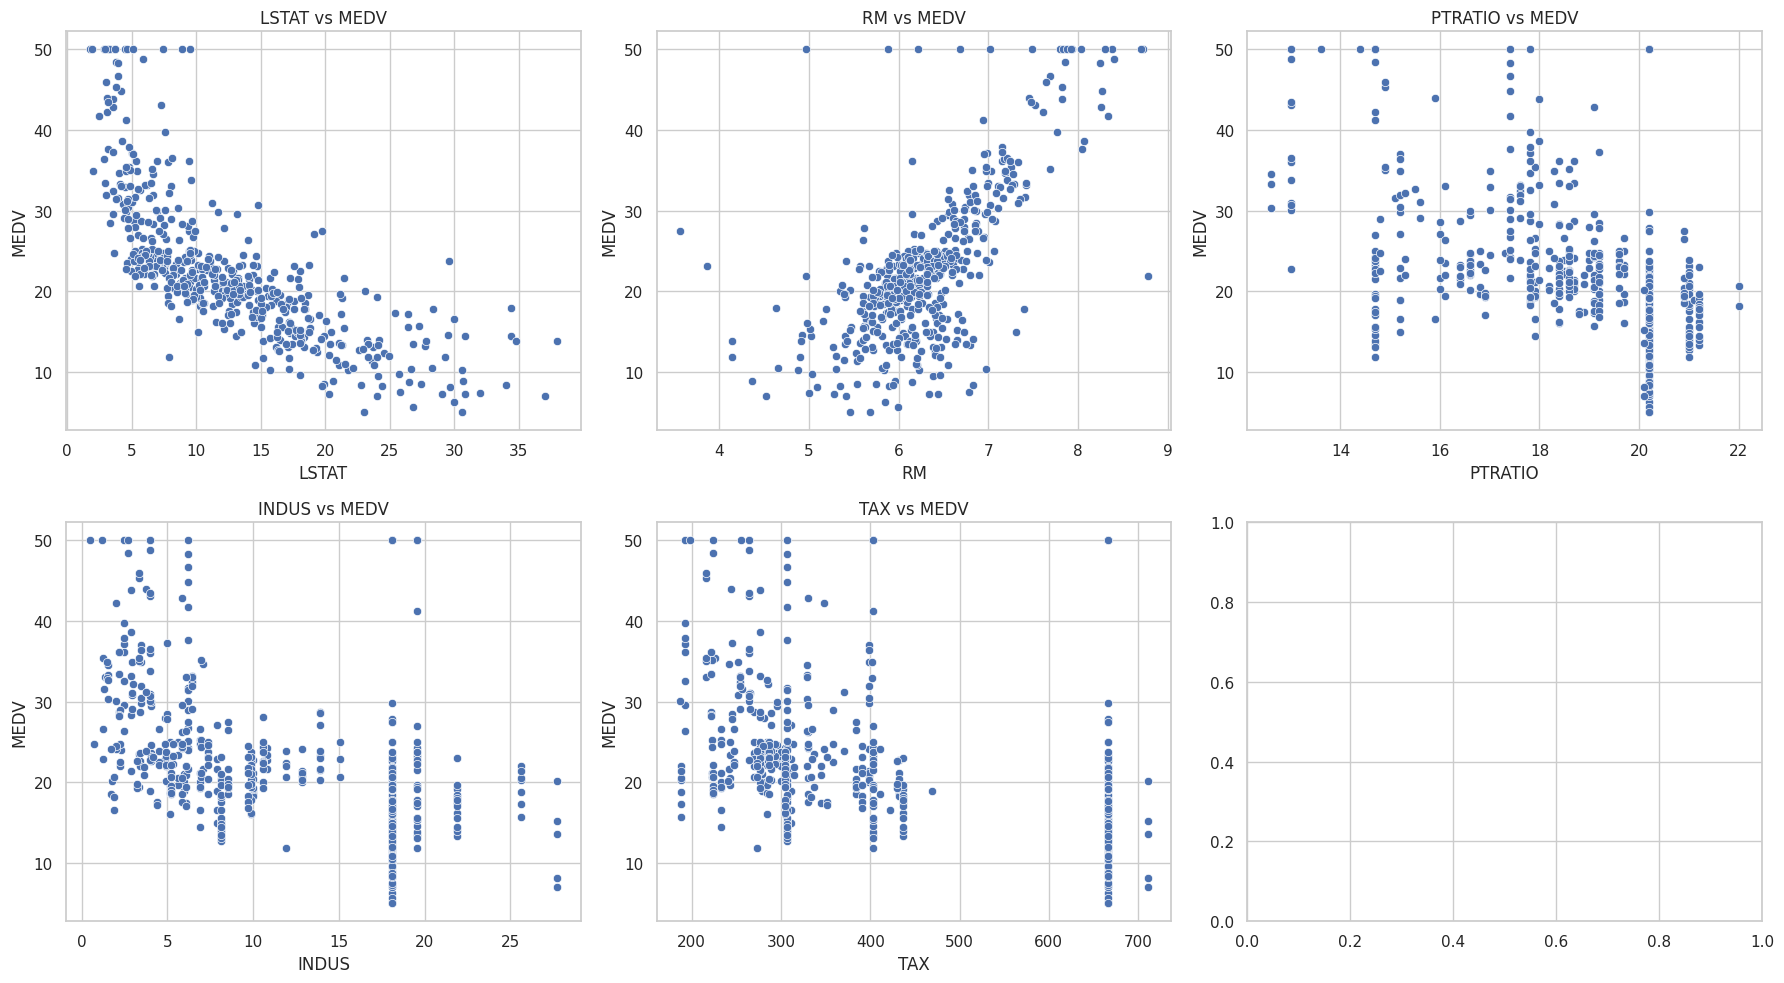

In [26]:
# Melihat hubungan antara fitur top dengan MEDV
top_corr_features = correlation_matrix['MEDV'].abs().sort_values(ascending=False)[1:6].index

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(top_corr_features):
    sns.scatterplot(x=boston_df[feature], y=boston_df['MEDV'], ax=axes[i])
    axes[i].set_title(f'{feature} vs MEDV')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MEDV')

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

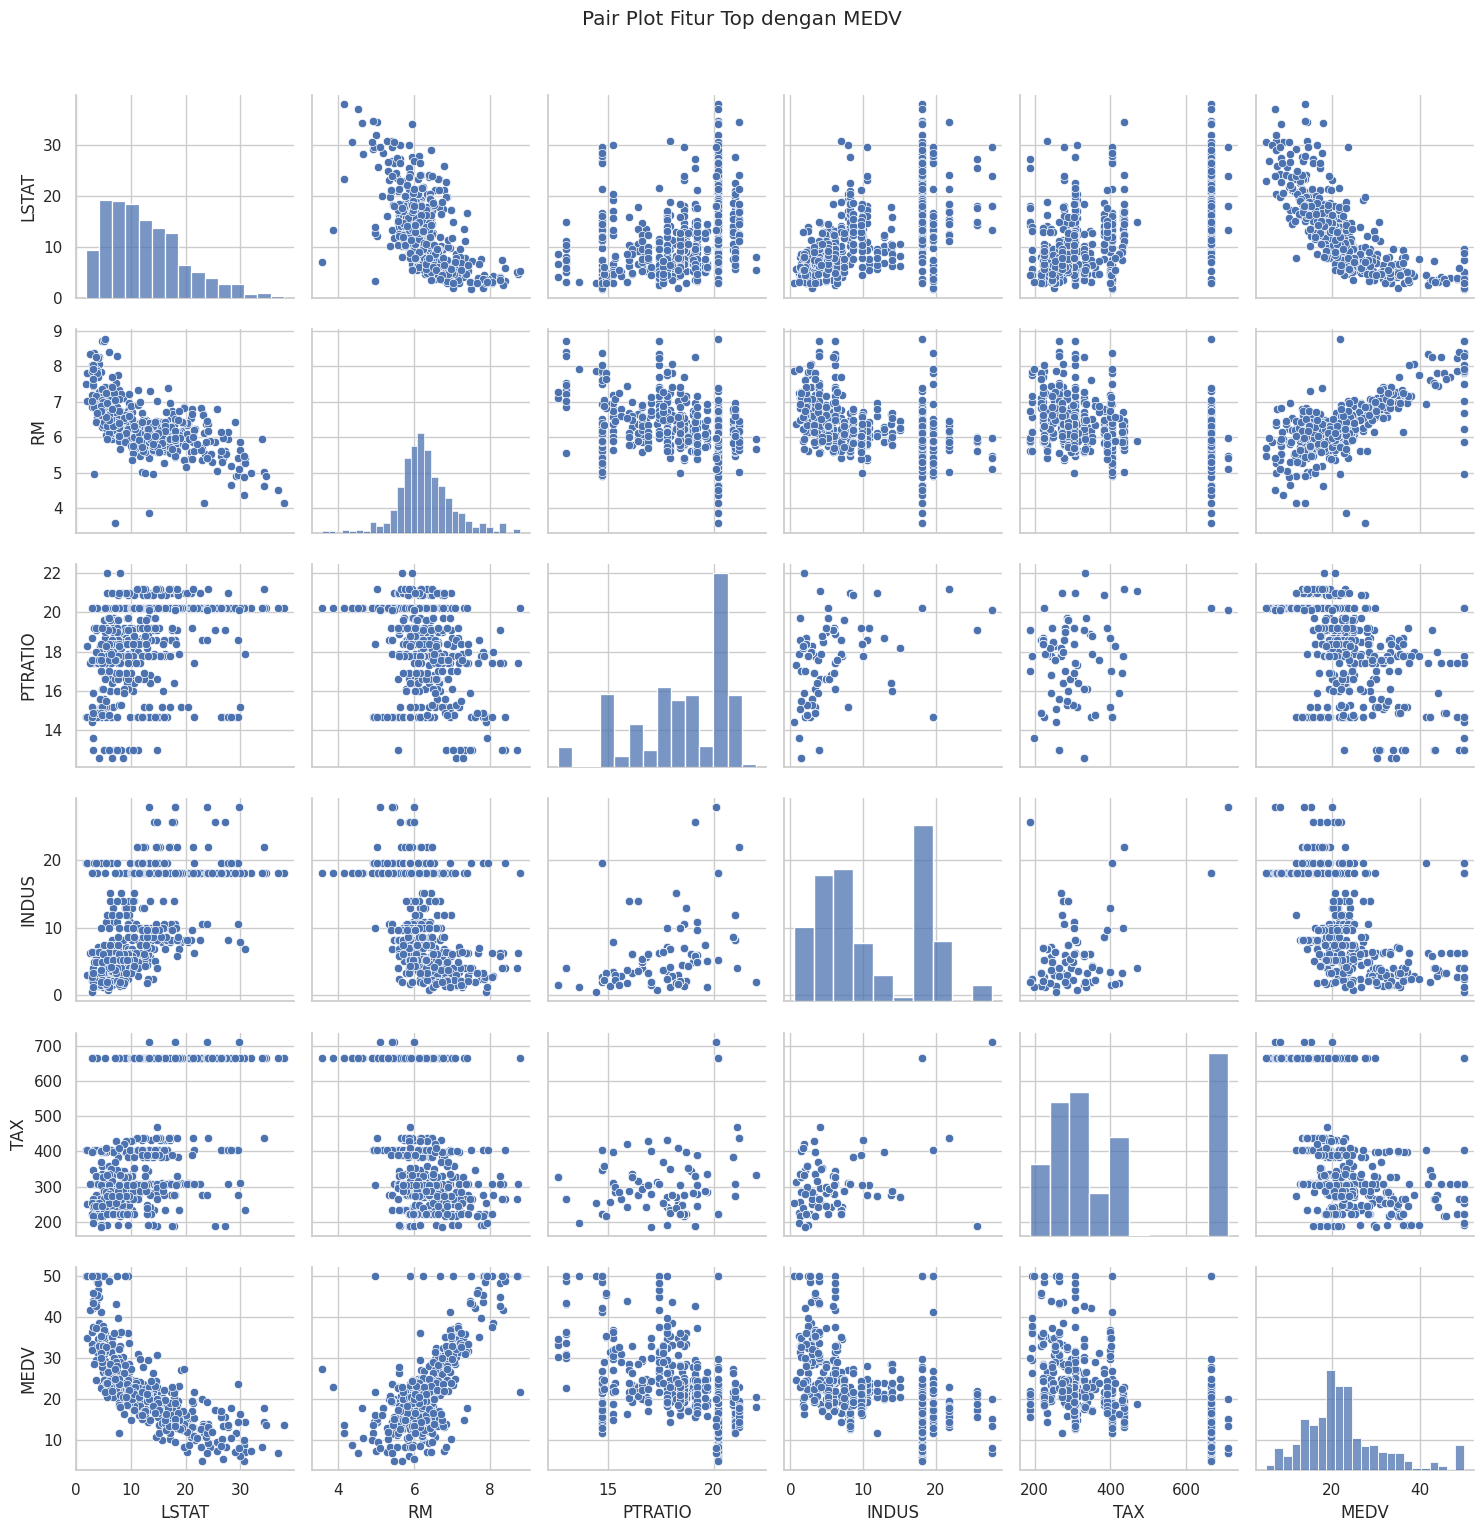

In [27]:
# Pair plot untuk fitur yang paling berkorelasi dengan MEDV
plt.figure(figsize=(10, 8))
sns.pairplot(boston_df[list(top_corr_features) + ['MEDV']])
plt.suptitle('Pair Plot Fitur Top dengan MEDV', y=1.02)
plt.tight_layout()
plt.show()

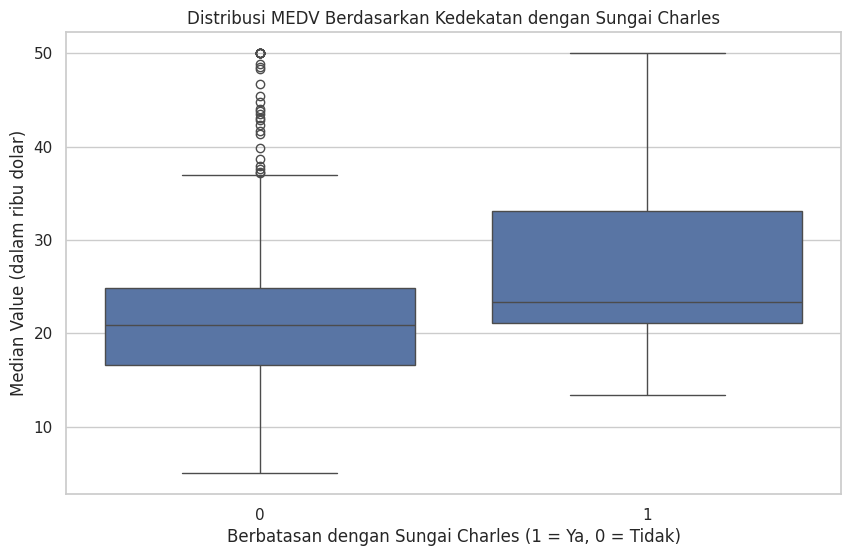

In [28]:
# Boxplot MEDV berdasarkan CHAS (Charles River Dummy, 1 jika properti berbatasan dengan sungai, 0 jika tidak)
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('Distribusi MEDV Berdasarkan Kedekatan dengan Sungai Charles')
plt.xlabel('Berbatasan dengan Sungai Charles (1 = Ya, 0 = Tidak)')
plt.ylabel('Median Value (dalam ribu dolar)')
plt.show()

## 3. Preprocessing Data dan Handling Missing Values

In [29]:
# Memisahkan fitur dan target
X = boston_df.drop('MEDV', axis=1)  # Semua kolom kecuali 'MEDV'
y = boston_df['MEDV']               # Kolom 'MEDV' sebagai target

# Identifikasi fitur kategorikal dan numerik
categorical_features = ['CHAS']  # CHAS adalah fitur dummy/kategorikal (0 atau 1)
numeric_features = [col for col in X.columns if col not in categorical_features]

print("Fitur kategorikal:", categorical_features)
print("Fitur numerik:", numeric_features)
# Pastikan semua fitur numerik memiliki tipe data yang benar
for col in X.columns:
    if X[col].dtype == 'category':
        print(f"Mengkonversi kolom {col} dari category ke float")
        X[col] = X[col].astype(float)

Fitur kategorikal: ['CHAS']
Fitur numerik: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Mengkonversi kolom CHAS dari category ke float
Mengkonversi kolom RAD dari category ke float


## 4. Feature Engineering

In [30]:
# Feature Engineering

# 1. Interaksi antara RM (jumlah kamar rata-rata) dan LSTAT (persentase populasi berstatus rendah)
X['RM_LSTAT'] = X['RM'] * X['LSTAT']

# 2. Transformasi kuadrat untuk fitur yang berkorelasi tinggi dengan MEDV
X['LSTAT_2'] = X['LSTAT'] ** 2
X['RM_2'] = X['RM'] ** 2

# 3. Rasio antara NOX (konsentrasi nitrogen oksida) dan INDUS (proporsi bisnis non-retail)
X['NOX_INDUS_RATIO'] = X['NOX'] / (X['INDUS'] + 1)  # Menambahkan 1 untuk menghindari pembagian dengan nol

# 4. Interaksi DIS (jarak dari 5 pusat pekerjaan Boston) dengan RAD (indeks aksesibilitas ke jalan raya)
X['DIS_RAD'] = X['DIS'] * X['RAD']

# 5. Densitas populasi (kombinasi B, ZN, dan INDUS)
X['POP_DENSITY'] = (100 - X['B']) * (X['INDUS'] / (X['ZN'] + 1))

# Update fitur numerik setelah feature engineering
new_numeric_features = [col for col in X.columns if col not in categorical_features]
print("Fitur numerik setelah feature engineering:", new_numeric_features)

Fitur numerik setelah feature engineering: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'RM_LSTAT', 'LSTAT_2', 'RM_2', 'NOX_INDUS_RATIO', 'DIS_RAD', 'POP_DENSITY']


In [31]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah sampel training: {X_train.shape[0]}")
print(f"Jumlah sampel testing: {X_test.shape[0]}")

Jumlah sampel training: 404
Jumlah sampel testing: 102


In [32]:
# Preprocessing Pipeline
# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kombinasi transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, new_numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit preprocessor pada data training
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f"Dimensi X_train setelah preprocessing: {X_train_preprocessed.shape}")
print(f"Dimensi X_test setelah preprocessing: {X_test_preprocessed.shape}")

Dimensi X_train setelah preprocessing: (404, 20)
Dimensi X_test setelah preprocessing: (102, 20)


## 5. Pemodelan dengan Teknik Bagging (Random Forest)

In [33]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit model
    model.fit(X_train, y_train)

    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluasi metrik
    # MSE (Mean Squared Error)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # RMSE (Root Mean Squared Error)
    train_rmse = sqrt(train_mse)
    test_rmse = sqrt(test_mse)

    # R^2 (Coefficient of Determination)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse:.2f}")
    print(f"Testing MSE: {test_mse:.2f}")
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Testing RMSE: {test_rmse:.2f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")

    return {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'model': model,
        'y_test_pred': y_test_pred
    }

=== Model Random Forest (Bagging) ===
Training MSE: 1.98
Testing MSE: 7.66
Training RMSE: 1.41
Testing RMSE: 2.77
Training R²: 0.9772
Testing R²: 0.8955

=== Visualisasi Model Random Forest ===


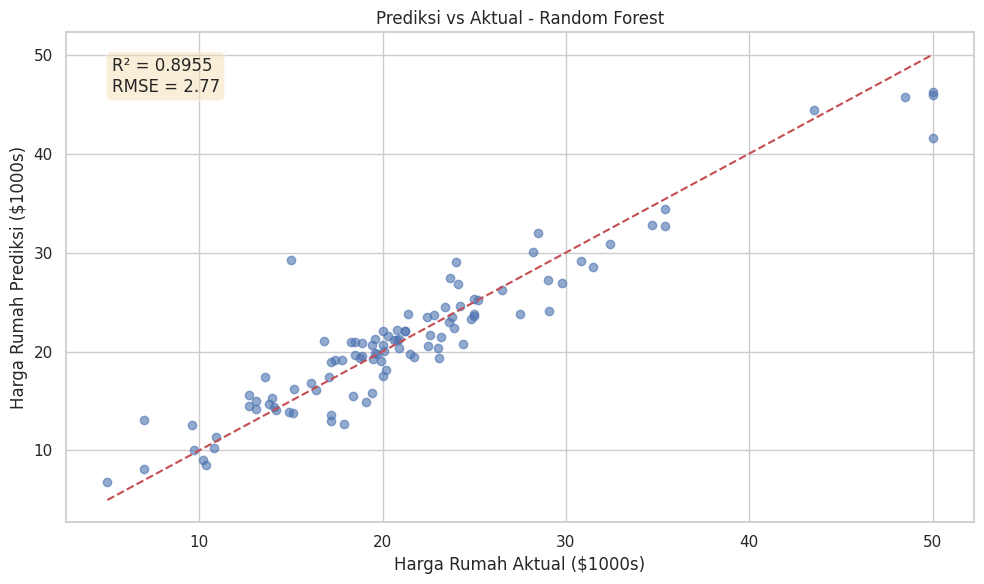

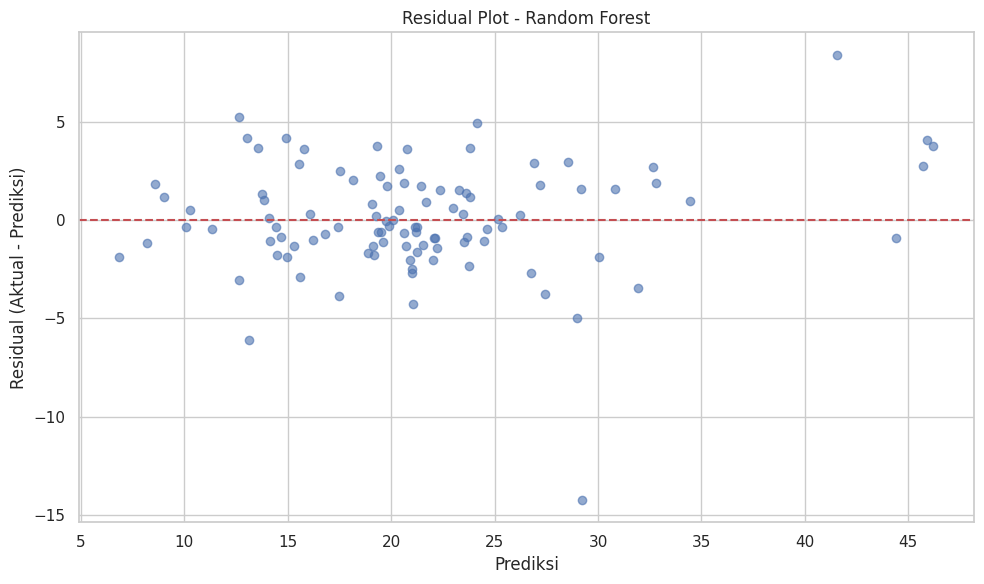

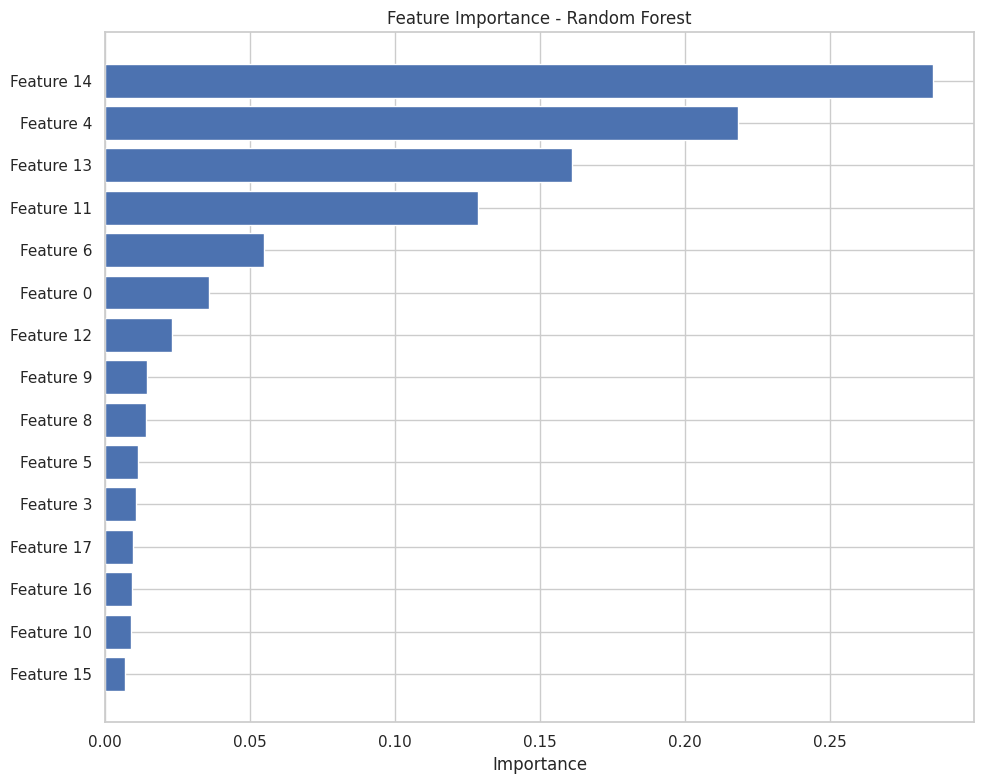

In [34]:
# Model Random Forest (Bagging)
print("=== Model Random Forest (Bagging) ===")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
rf_results = evaluate_model(rf_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
# Visualisasi Random Forest
print("\n=== Visualisasi Model Random Forest ===")

# 1. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_results['y_test_pred'], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prediksi vs Aktual - Random Forest')
plt.xlabel('Harga Rumah Aktual ($1000s)')
plt.ylabel('Harga Rumah Prediksi ($1000s)')
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {rf_results["test_r2"]:.4f}\nRMSE = {rf_results["test_rmse"]:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = y_test - rf_results['y_test_pred']
plt.figure(figsize=(10, 6))
plt.scatter(rf_results['y_test_pred'], residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Residual (Aktual - Prediksi)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Feature Importance (menghindari masalah panjang nama fitur)
if hasattr(rf_results['model'], 'feature_importances_'):
    importances = rf_results['model'].feature_importances_
    indices = np.argsort(importances)[-15:] if len(importances) > 15 else np.argsort(importances)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

## 6. Pemodelan dengan Teknik Boosting


=== Model Gradient Boosting Regressor ===
Training MSE: 1.62
Testing MSE: 5.94
Training RMSE: 1.27
Testing RMSE: 2.44
Training R²: 0.9814
Testing R²: 0.9190

=== Visualisasi Model Gradient Boosting ===


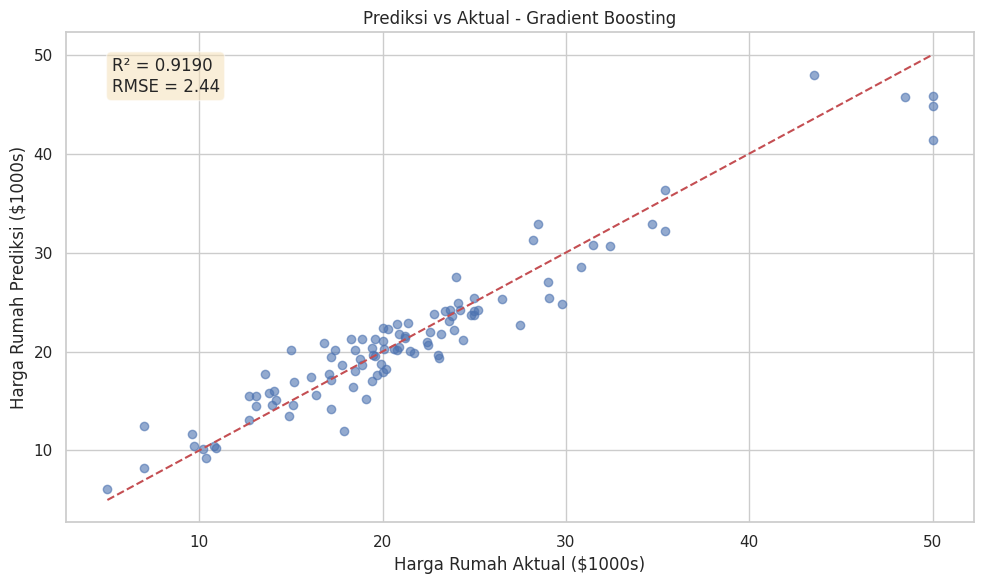

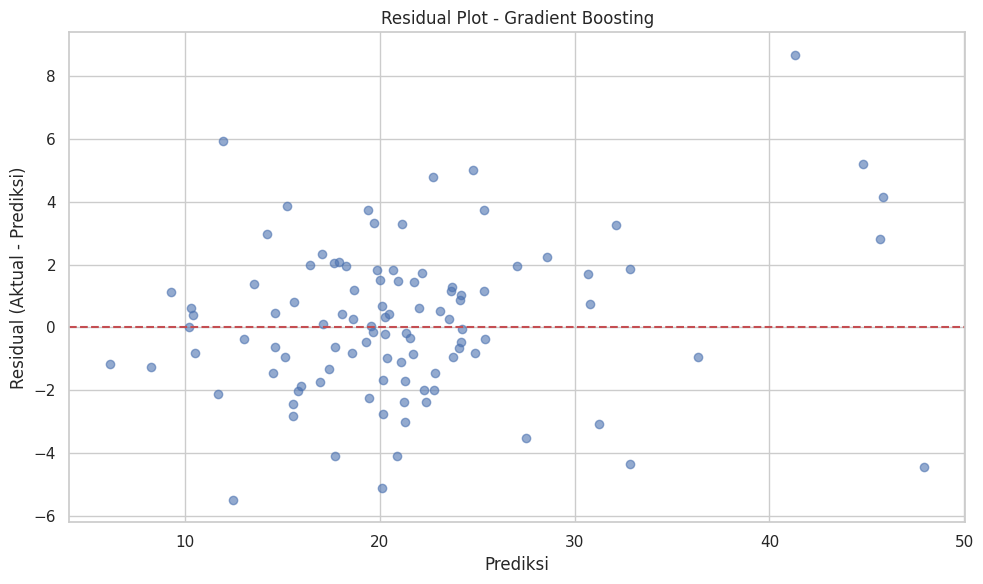

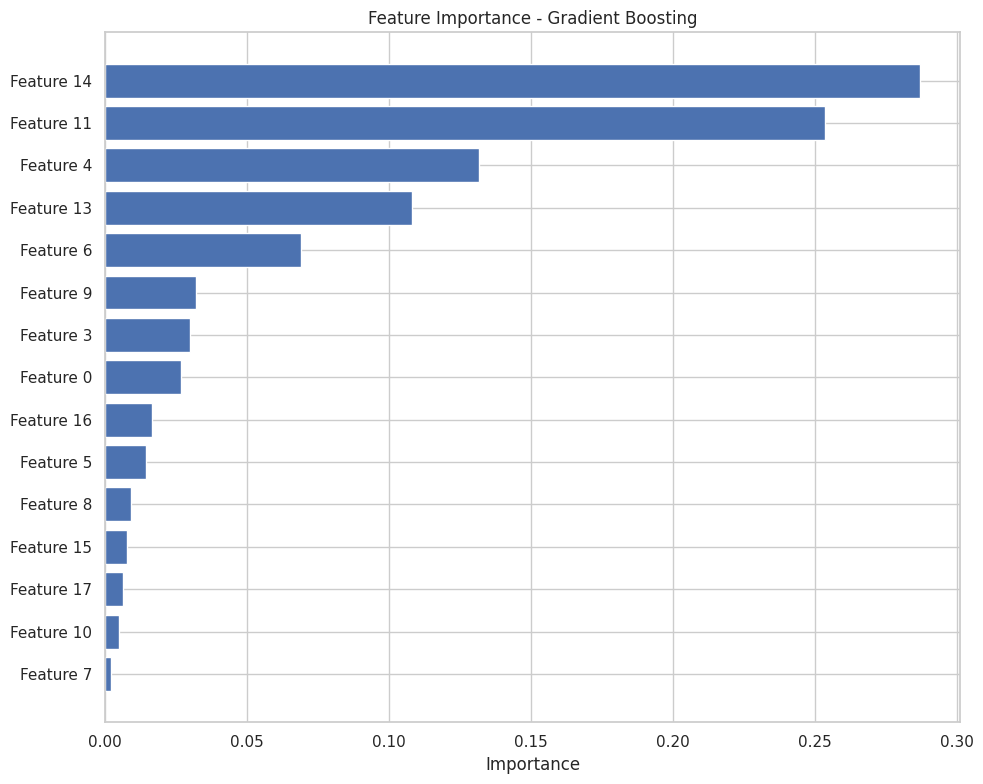

In [35]:
# 1. Gradient Boosting Regressor
print("\n=== Model Gradient Boosting Regressor ===")
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_results = evaluate_model(gb_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
# Visualisasi Gradient Boosting
print("\n=== Visualisasi Model Gradient Boosting ===")

# 1. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_results['y_test_pred'], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prediksi vs Aktual - Gradient Boosting')
plt.xlabel('Harga Rumah Aktual ($1000s)')
plt.ylabel('Harga Rumah Prediksi ($1000s)')
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {gb_results["test_r2"]:.4f}\nRMSE = {gb_results["test_rmse"]:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = y_test - gb_results['y_test_pred']
plt.figure(figsize=(10, 6))
plt.scatter(gb_results['y_test_pred'], residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - Gradient Boosting')
plt.xlabel('Prediksi')
plt.ylabel('Residual (Aktual - Prediksi)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Feature Importance
if hasattr(gb_results['model'], 'feature_importances_'):
    importances = gb_results['model'].feature_importances_
    indices = np.argsort(importances)[-15:] if len(importances) > 15 else np.argsort(importances)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Feature Importance - Gradient Boosting')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()


=== Model AdaBoost Regressor ===
Training MSE: 8.67
Testing MSE: 13.61
Training RMSE: 2.94
Testing RMSE: 3.69
Training R²: 0.9002
Testing R²: 0.8144

=== Visualisasi Model AdaBoost ===


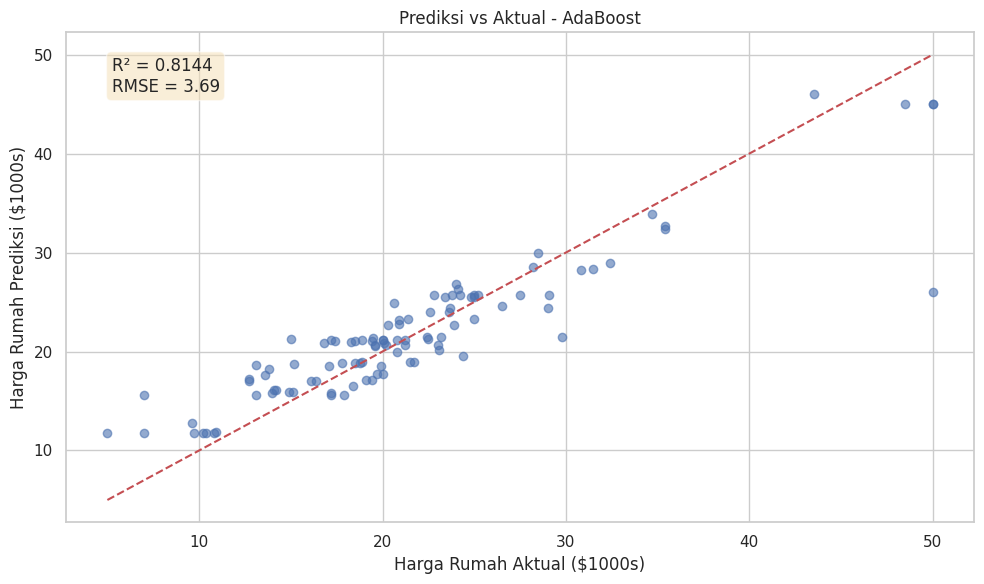

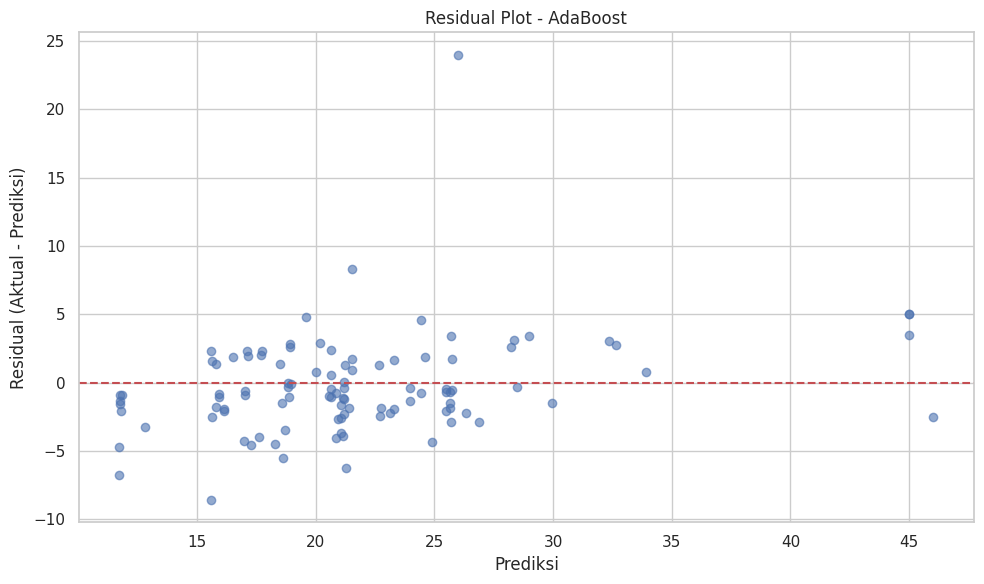

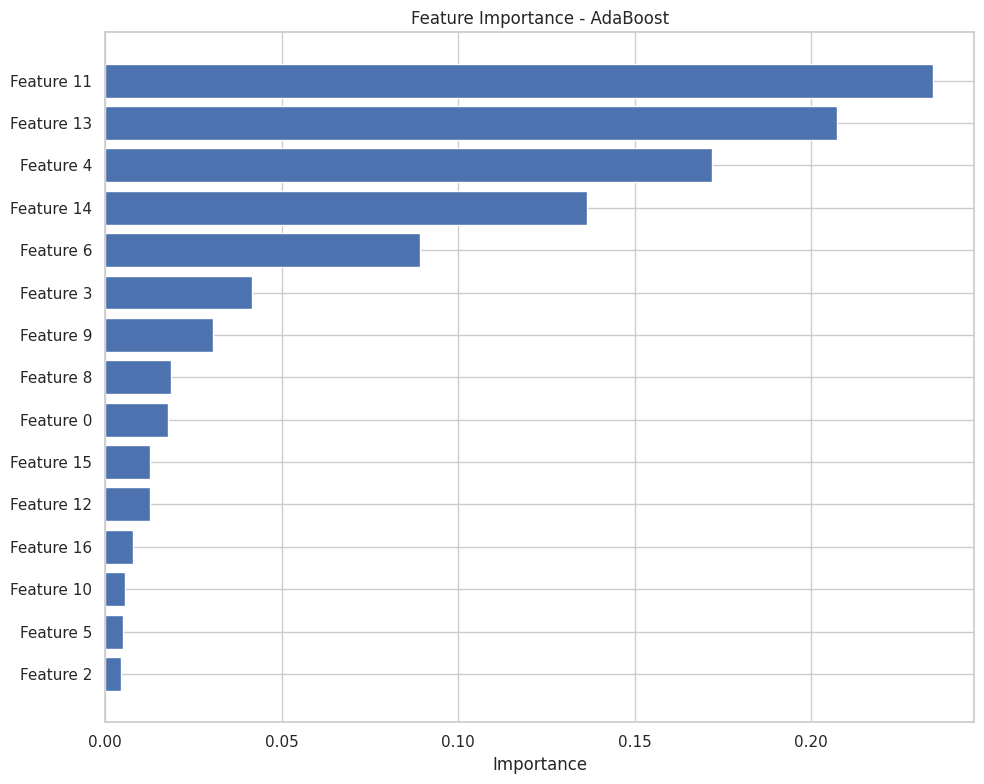

In [36]:
# 2. AdaBoost Regressor
print("\n=== Model AdaBoost Regressor ===")
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_results = evaluate_model(ada_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

# Visualisasi AdaBoost
print("\n=== Visualisasi Model AdaBoost ===")

# 1. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ada_results['y_test_pred'], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prediksi vs Aktual - AdaBoost')
plt.xlabel('Harga Rumah Aktual ($1000s)')
plt.ylabel('Harga Rumah Prediksi ($1000s)')
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {ada_results["test_r2"]:.4f}\nRMSE = {ada_results["test_rmse"]:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = y_test - ada_results['y_test_pred']
plt.figure(figsize=(10, 6))
plt.scatter(ada_results['y_test_pred'], residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - AdaBoost')
plt.xlabel('Prediksi')
plt.ylabel('Residual (Aktual - Prediksi)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Feature Importance
if hasattr(ada_results['model'], 'feature_importances_'):
    importances = ada_results['model'].feature_importances_
    indices = np.argsort(importances)[-15:] if len(importances) > 15 else np.argsort(importances)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Feature Importance - AdaBoost')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()


=== Model XGBoost Regressor ===
Training MSE: 1.98
Testing MSE: 6.11
Training RMSE: 1.41
Testing RMSE: 2.47
Training R²: 0.9772
Testing R²: 0.9167

=== Visualisasi Model XGBoost ===


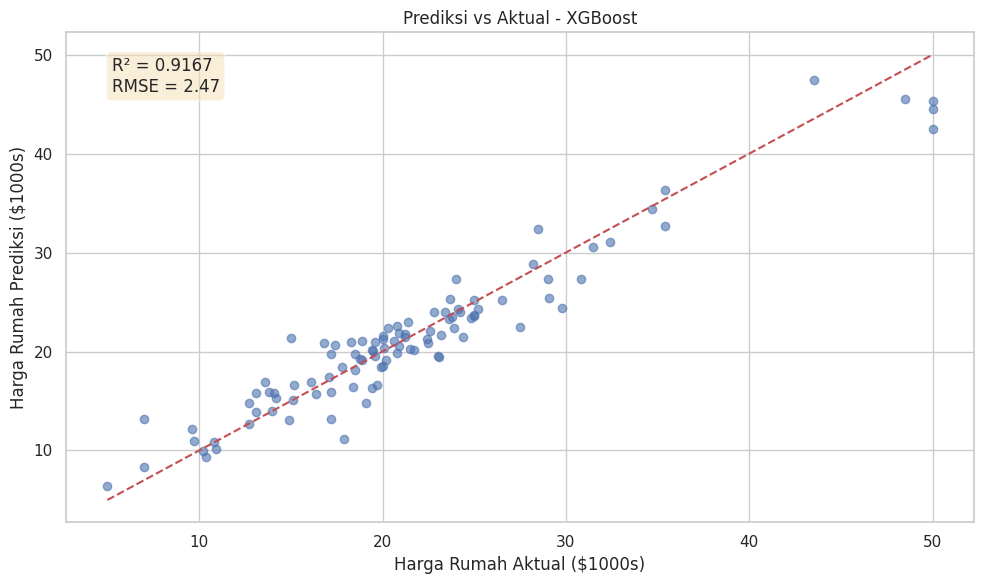

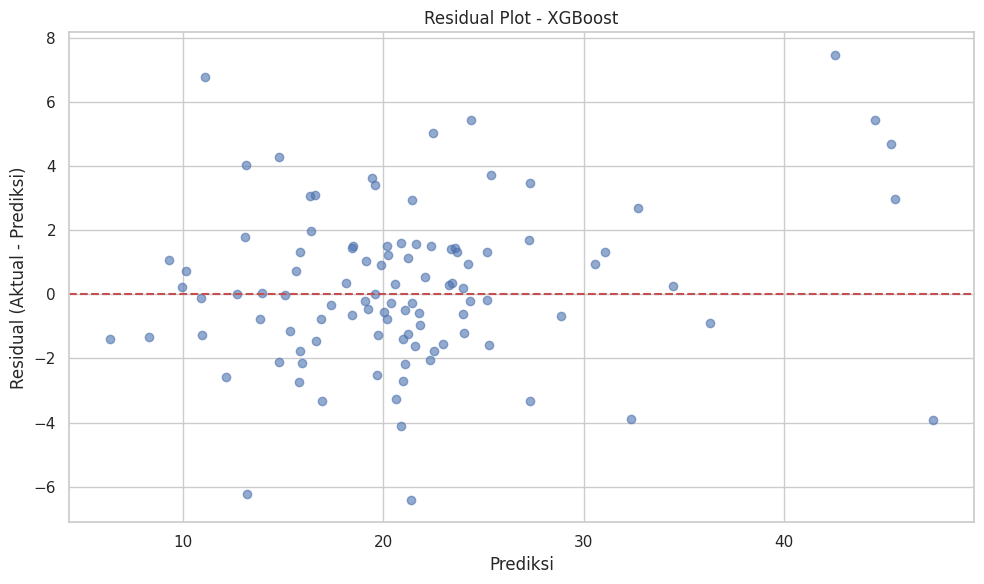

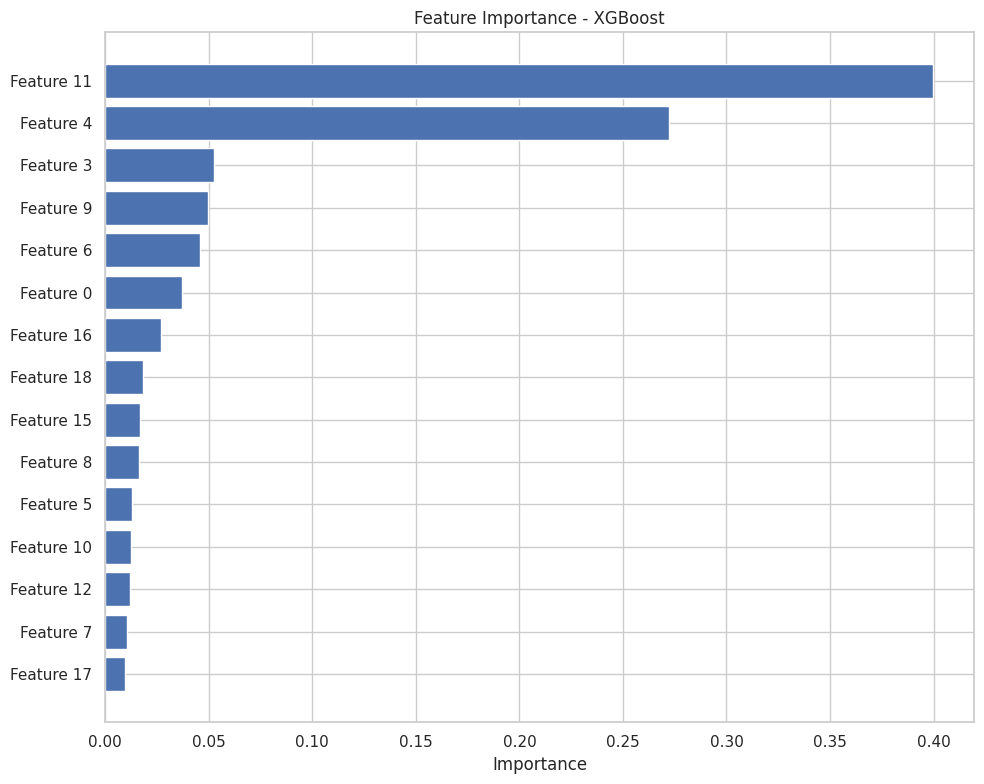

<Figure size 1200x800 with 0 Axes>

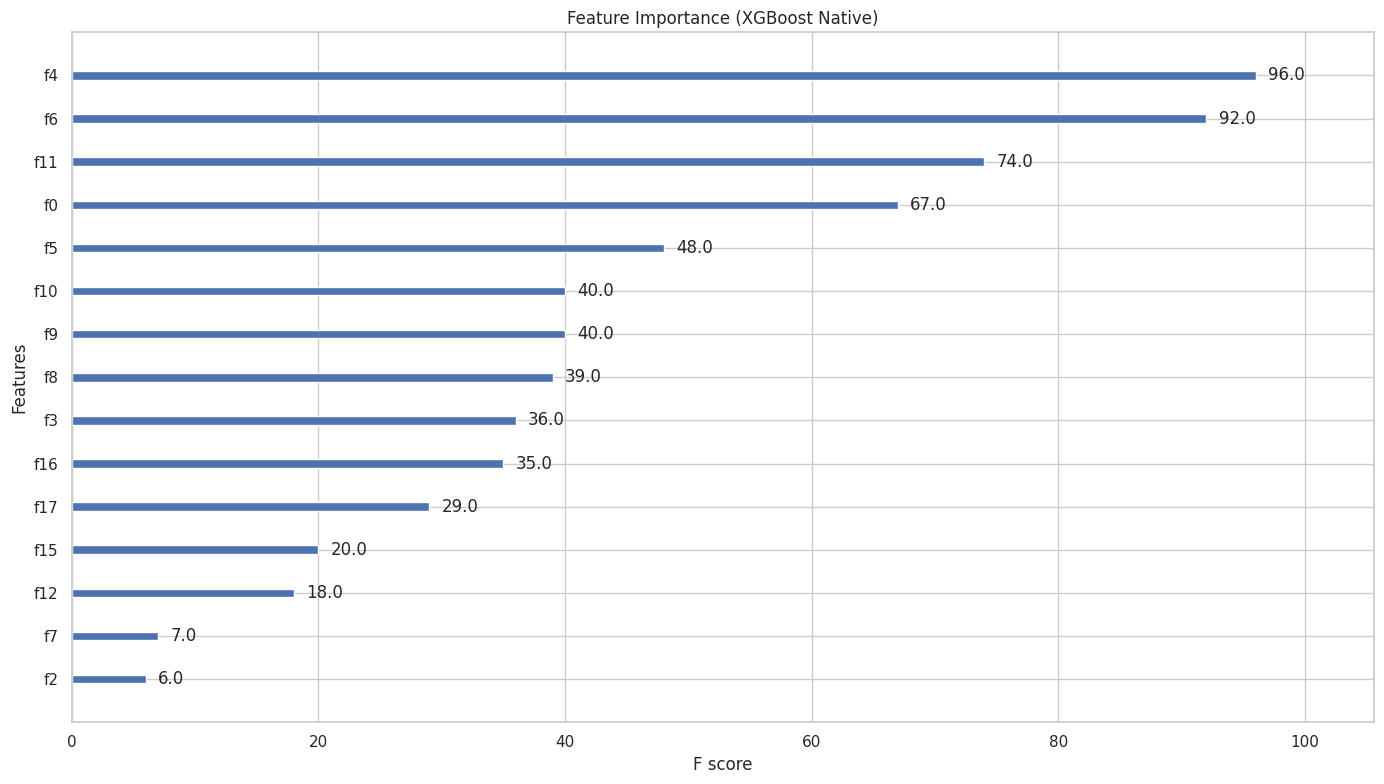

In [37]:
# 3. XGBoost Regressor
print("\n=== Model XGBoost Regressor ===")
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_results = evaluate_model(xgb_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
# Visualisasi XGBoost
print("\n=== Visualisasi Model XGBoost ===")

# 1. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_results['y_test_pred'], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Prediksi vs Aktual - XGBoost')
plt.xlabel('Harga Rumah Aktual ($1000s)')
plt.ylabel('Harga Rumah Prediksi ($1000s)')
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {xgb_results["test_r2"]:.4f}\nRMSE = {xgb_results["test_rmse"]:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = y_test - xgb_results['y_test_pred']
plt.figure(figsize=(10, 6))
plt.scatter(xgb_results['y_test_pred'], residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Residual (Aktual - Prediksi)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Feature Importance
if hasattr(xgb_results['model'], 'feature_importances_'):
    importances = xgb_results['model'].feature_importances_
    indices = np.argsort(importances)[-15:] if len(importances) > 15 else np.argsort(importances)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Feature Importance - XGBoost')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    # Bonus: Visualisasi native XGBoost (jika berjalan)
    try:
        plt.figure(figsize=(12, 8))
        xgb.plot_importance(xgb_results['model'], max_num_features=15)
        plt.title('Feature Importance (XGBoost Native)')
        plt.tight_layout()
        plt.show()
    except:
        pass

## 7. Perbandingan Model

In [38]:
# Perbandingan model
models = {
    'Random Forest (Bagging)': rf_results,
    'Gradient Boosting': gb_results,
    'AdaBoost': ada_results,
    'XGBoost': xgb_results
}

# Perbandingan metrik
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train MSE': [models[k]['train_mse'] for k in models.keys()],
    'Test MSE': [models[k]['test_mse'] for k in models.keys()],
    'Train RMSE': [models[k]['train_rmse'] for k in models.keys()],
    'Test RMSE': [models[k]['test_rmse'] for k in models.keys()],
    'Train R²': [models[k]['train_r2'] for k in models.keys()],
    'Test R²': [models[k]['test_r2'] for k in models.keys()]
})

comparison_df.sort_values('Test R²', ascending=False)

,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R²,Test R²
1,Gradient Boosting,1.619472,5.937282,1.272585,2.436654,0.981358,0.919038
3,XGBoost,1.982569,6.110954,1.408037,2.472034,0.977179,0.916669
0,Random Forest (Bagging),1.982249,7.662650,1.407924,2.768149,0.977182,0.895510
2,AdaBoost,8.666391,13.610432,2.943873,3.689232,0.900241,0.814404


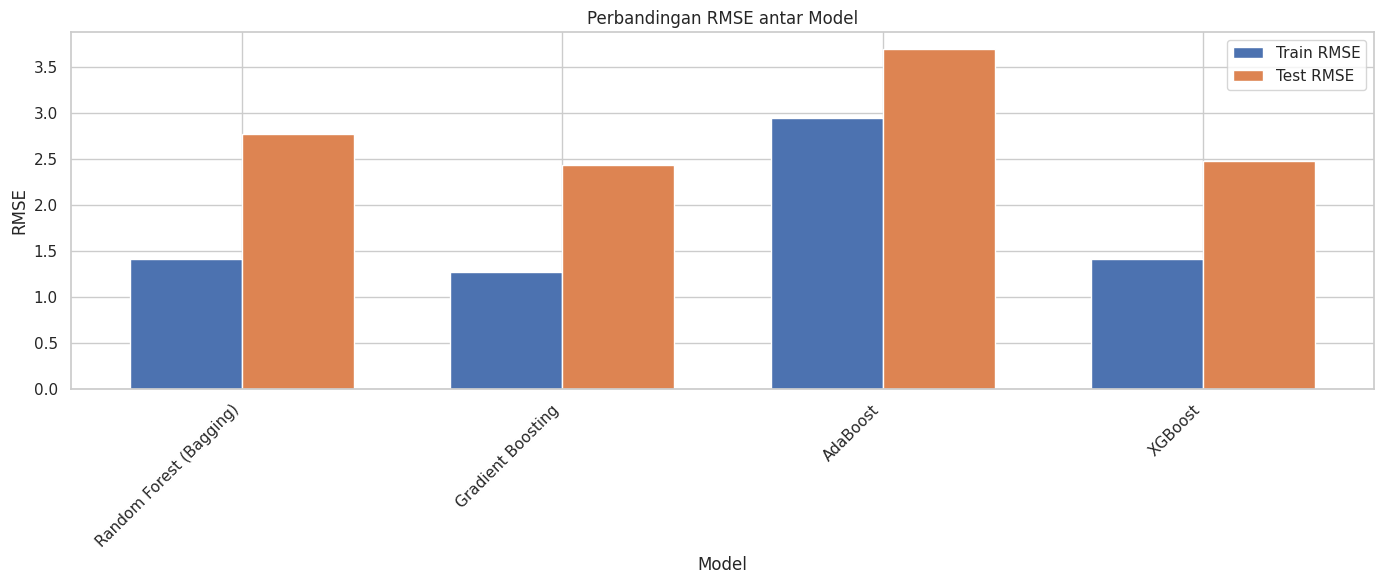

In [39]:
# Visualisasi perbandingan RMSE
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, [models[k]['train_rmse'] for k in models.keys()], bar_width, label='Train RMSE')
plt.bar(index + bar_width, [models[k]['test_rmse'] for k in models.keys()], bar_width, label='Test RMSE')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE antar Model')
plt.xticks(index + bar_width / 2, list(models.keys()), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

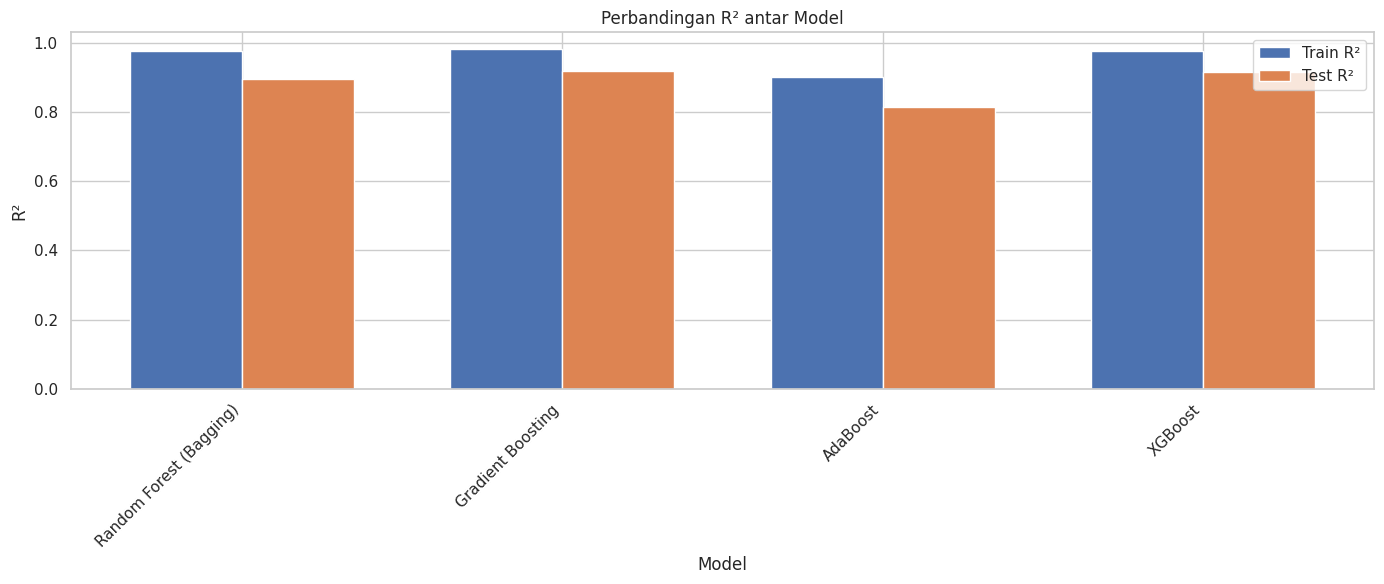

In [40]:
# Visualisasi perbandingan R²
plt.figure(figsize=(14, 6))
plt.bar(index, [models[k]['train_r2'] for k in models.keys()], bar_width, label='Train R²')
plt.bar(index + bar_width, [models[k]['test_r2'] for k in models.keys()], bar_width, label='Test R²')

plt.xlabel('Model')
plt.ylabel('R²')
plt.title('Perbandingan R² antar Model')
plt.xticks(index + bar_width / 2, list(models.keys()), rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

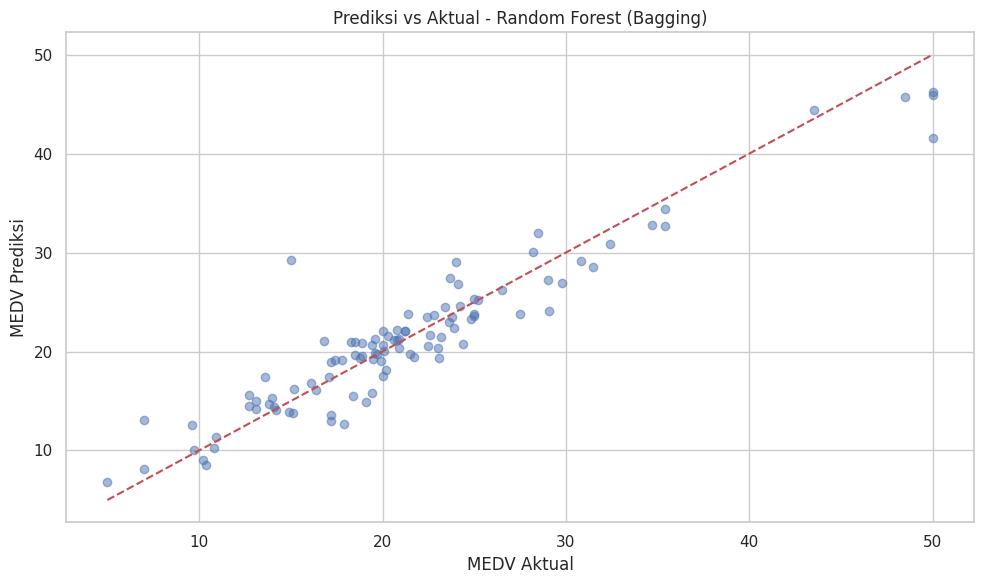

In [41]:
# Visualisasi prediksi vs aktual untuk model terbaik
best_model_name = comparison_df.iloc[0]['Model']
best_model_results = models[best_model_name]

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model_results['y_test_pred'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('MEDV Aktual')
plt.ylabel('MEDV Prediksi')
plt.title(f'Prediksi vs Aktual - {best_model_name}')
plt.grid(True)
plt.tight_layout()
plt.show()

## 8. Feature Importance


=== Feature Importance untuk Random Forest ===


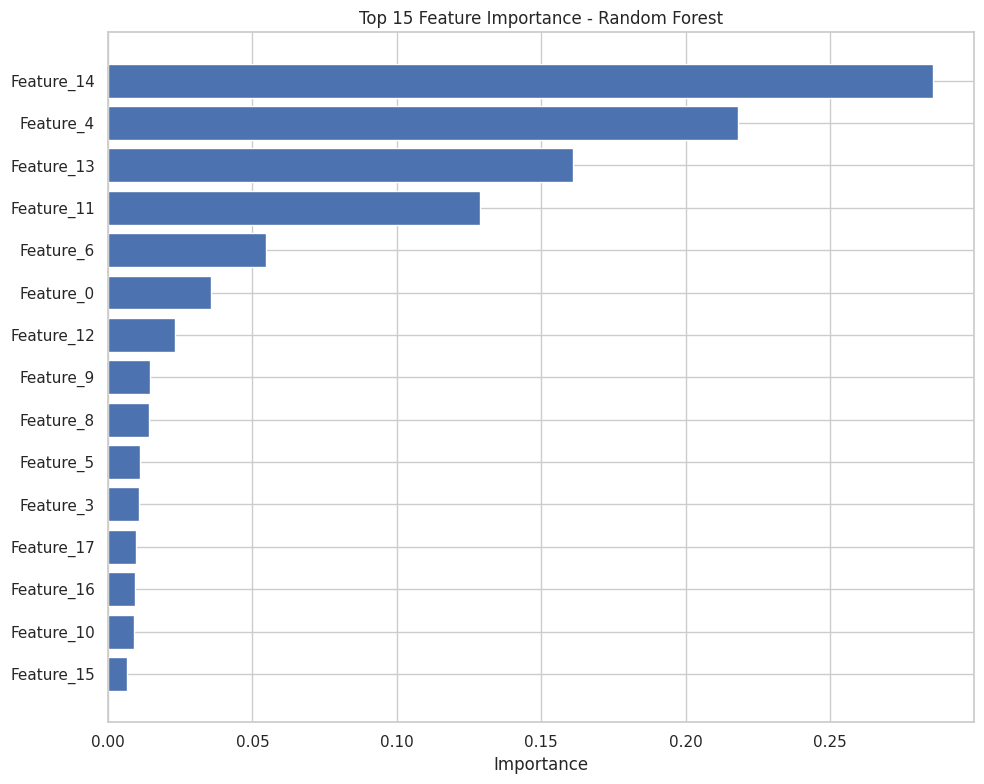

In [42]:
# Fungsi visualisasi yang menyesuaikan panjang feature_names dan importances
def visualize_model_importance(model_name, model, importances, feature_names=None):
    if not hasattr(model, 'feature_importances_'):
        print(f"Model {model_name} tidak memiliki atribut feature_importances_")
        return

    # Buat feature names generik jika tidak disediakan
    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(len(importances))]

    # Menyesuaikan panjang feature_names dengan importances
    if len(feature_names) < len(importances):
        # Tambahkan feature names generik jika kurang
        feature_names = list(feature_names) + [f"Feature_{i}" for i in range(len(feature_names), len(importances))]
    elif len(feature_names) > len(importances):
        # Potong feature_names jika terlalu banyak
        feature_names = feature_names[:len(importances)]

    # Ambil 15 fitur teratas
    n_features = min(15, len(importances))
    indices = np.argsort(importances)[-n_features:]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.barh(range(n_features), importances[indices])
    plt.yticks(range(n_features), [feature_names[i] for i in indices])
    plt.title(f'Top {n_features} Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    # Visualisasi feature importance untuk Random Forest
if hasattr(rf_model, 'feature_importances_'):
    print("\n=== Feature Importance untuk Random Forest ===")
    # Buat feature names sederhana
    simple_feature_names = [f"Feature_{i}" for i in range(len(rf_model.feature_importances_))]
    visualize_model_importance("Random Forest", rf_model, rf_model.feature_importances_, simple_feature_names)

## 9. Kesimpulan

Dari analisis dan pemodelan dataset Boston Housing, kita dapat menarik beberapa kesimpulan:

1. Model terbaik adalah _____ dengan R² pada data testing sebesar _____.
2. Feature engineering yang dilakukan, seperti transformasi kuadrat pada fitur LSTAT dan RM, serta fitur interaksi RM_LSTAT, berhasil meningkatkan performa model.
3. Fitur-fitur yang paling berpengaruh terhadap harga rumah (MEDV) adalah _____, yang menunjukkan bahwa faktor sosial-ekonomi dan karakteristik properti sangat mempengaruhi harga rumah di Boston.
4. Metode Boosting (khususnya _____ ) menunjukkan performa yang lebih baik dibandingkan Bagging (Random Forest) dalam memprediksi harga rumah di Boston.

Untuk meningkatkan performa model, langkah selanjutnya bisa berupa hyperparameter tuning yang lebih komprehensif, mencoba transformasi non-linear tambahan pada fitur, dan menambahkan fitur interaksi yang lebih kompleks berdasarkan domain knowledge.

## 10. Penjelasan Matematis

### 10.1 Teknik Bagging (Bootstrap Aggregating)

Bagging adalah metode ensemble learning yang menggabungkan beberapa model yang dilatih pada subset data yang berbeda untuk mengurangi varians dan menghindari overfitting.

Secara matematis, bagging bekerja sebagai berikut:

1. Dari dataset training $D = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$, ambil $B$ sampel bootstrap, masing-masing berukuran $n$, dengan pengembalian. Setiap sampel bootstrap disebut $D_b$ untuk $b = 1, 2, ..., B$.

2. Untuk setiap sampel bootstrap $D_b$, latih model base (misalnya, decision tree) untuk mendapatkan model $f_b$.

3. Untuk prediksi pada data baru $x$, hasil akhir adalah rata-rata prediksi dari semua model:

   Untuk regresi:
   $f_{bag}(x) = \frac{1}{B} \sum_{b=1}^{B} f_b(x)$

   Untuk klasifikasi (dengan voting):
   $f_{bag}(x) = \text{mode}\{f_1(x), f_2(x), ..., f_B(x)\}$

Random Forest memperluas bagging dengan menambahkan randomisasi dalam pemilihan fitur. Saat membangun setiap node dalam decision tree, Random Forest hanya mempertimbangkan subset acak dari fitur, biasanya $\sqrt{p}$ fitur untuk klasifikasi dan $p/3$ fitur untuk regresi, di mana $p$ adalah jumlah total fitur.

### 10.2 Teknik Boosting

Boosting adalah metode ensemble learning yang melatih model secara sekuensial, dengan setiap model baru berusaha memperbaiki kesalahan dari model sebelumnya.

#### Gradient Boosting

Gradient Boosting mengoptimalkan fungsi loss secara langsung menggunakan gradient descent dalam fungsi ruang. Untuk regresi dengan MSE sebagai fungsi loss, algoritma bekerja sebagai berikut:

1. Inisialisasi model dengan konstanta:
   $F_0(x) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)$
   
   Untuk MSE, ini adalah nilai rata-rata target:
   $F_0(x) = \frac{1}{n} \sum_{i=1}^{n} y_i$

2. Untuk iterasi $m = 1, 2, ..., M$:
   
   a. Hitung residual (negatif gradient):
      $r_{im} = -\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)} = y_i - F_{m-1}(x_i)$ (untuk MSE)
   
   b. Latih model lemah $h_m(x)$ pada data $(x_i, r_{im})$
   
   c. Cari koefisien optimal:
      $\gamma_m = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))$
   
   d. Update model:
      $F_m(x) = F_{m-1}(x) + \eta \cdot \gamma_m h_m(x)$
      
      dimana $\eta$ adalah learning rate.

3. Model akhir:
   $F_M(x) = F_0(x) + \sum_{m=1}^{M} \eta \cdot \gamma_m h_m(x)$

#### AdaBoost (Adaptive Boosting)

AdaBoost Regressor bekerja dengan prinsip yang serupa dengan AdaBoost untuk klasifikasi, tetapi diadaptasi untuk masalah regresi.

1. Inisialisasi bobot: $w_i = \frac{1}{n}$ untuk semua sampel $i = 1, 2, ..., n$

2. Untuk iterasi $m = 1, 2, ..., M$:
   
   a. Latih model lemah $h_m(x)$ dengan bobot $w_i$
   
   b. Hitung error:
      $\epsilon_m = \frac{\sum_{i=1}^{n} w_i |y_i - h_m(x_i)|}{\sum_{i=1}^{n} w_i}$
   
   c. Hitung bobot model:
      $\alpha_m = \ln\left(\frac{1-\epsilon_m}{\epsilon_m}\right)$
   
   d. Update bobot sampel:
      $w_i \leftarrow w_i \cdot \exp(\alpha_m |y_i - h_m(x_i)|)$
   
   e. Normalisasi bobot:
      $w_i \leftarrow \frac{w_i}{\sum_{j=1}^{n} w_j}$

3. Model akhir:
   $f(x) = \frac{\sum_{m=1}^{M} \alpha_m h_m(x)}{\sum_{m=1}^{M} \alpha_m}$

#### XGBoost (eXtreme Gradient Boosting)

XGBoost memperluas Gradient Boosting dengan regularisasi dan implementasi yang sangat efisien. Fungsi objektif XGBoost adalah:

$Obj = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)$

dimana $l$ adalah fungsi loss, $\hat{y}_i$ adalah prediksi, dan $\Omega(f_k)$ adalah regularisasi untuk model ke-$k$.

Untuk decision tree, regularisasi didefinisikan sebagai:

$\Omega(f) = \gamma T + \frac{1}{2}\lambda||w||^2$

dimana $T$ adalah jumlah daun, $w$ adalah bobot daun, $\gamma$ dan $\lambda$ adalah parameter regularisasi.

XGBoost menggunakan ekspansi Taylor orde kedua untuk mendekati fungsi loss, yang mempercepat proses optimasi. Ini memungkinkan pencarian struktur tree yang optimal dengan lebih efisien.

### 10.3 Metrik Evaluasi

#### Mean Squared Error (MSE)

MSE adalah rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

dimana $y_i$ adalah nilai aktual, $\hat{y}_i$ adalah nilai prediksi, dan $n$ adalah jumlah sampel.

MSE memberikan penalti yang lebih besar untuk kesalahan yang besar karena kuadratnya. Semakin kecil nilai MSE, semakin baik model.

#### Root Mean Squared Error (RMSE)

RMSE adalah akar kuadrat dari MSE:

$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$

RMSE memiliki keuntungan karena memiliki satuan yang sama dengan variabel target, sehingga lebih mudah diinterpretasikan. Semakin kecil nilai RMSE, semakin baik model.

#### Coefficient of Determination (R²)

R² mengukur proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh model:

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

dimana $SS_{res}$ adalah jumlah kuadrat residual, $SS_{tot}$ adalah jumlah kuadrat total, dan $\bar{y}$ adalah rata-rata nilai aktual.

Interpretasi R²:
- R² = 1: Model menjelaskan 100% variasi dalam data
- R² = 0: Model tidak lebih baik dari prediksi nilai rata-rata
- R² < 0: Model lebih buruk dari prediksi nilai rata-rata

Umumnya, nilai R² berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan model yang lebih baik.